# Titanic Disaster with ANN
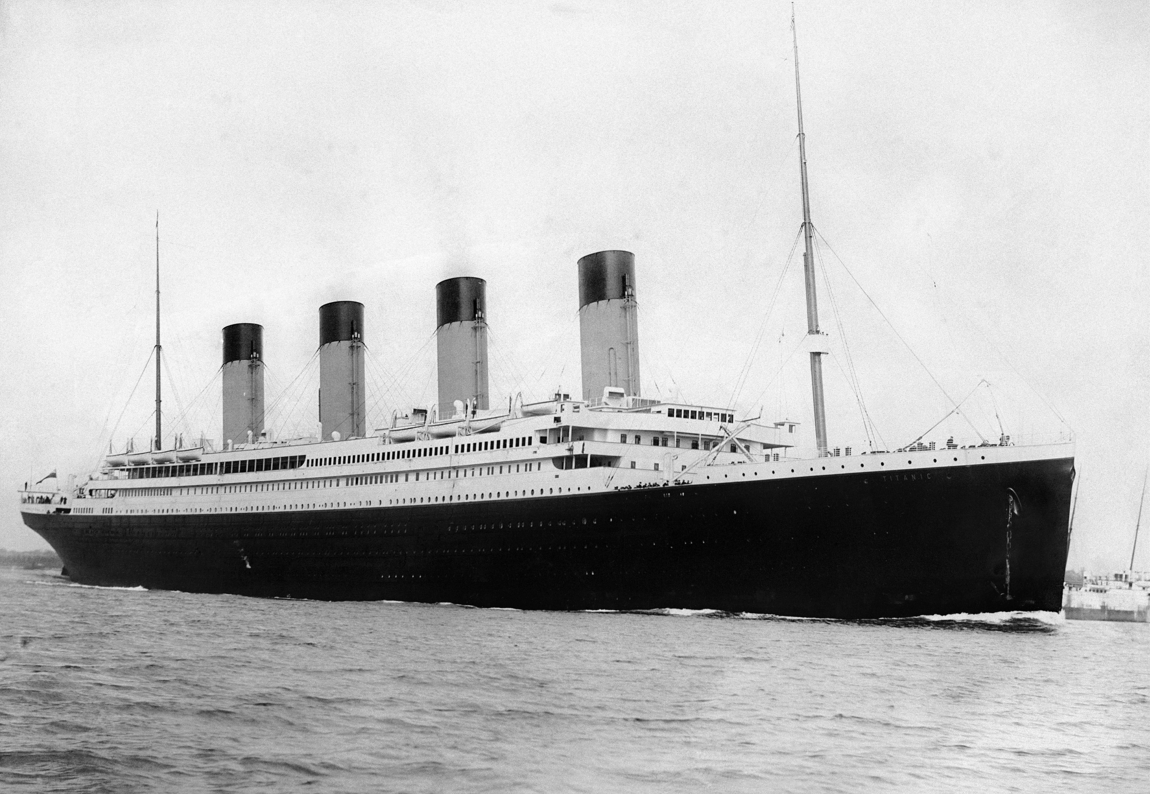

Kaggle competition: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

1. Challenge
2. Data Understanding
3. Exploratory Data Analysis
4. Feature Engineering
5. Modeling and Evaluating


# 1. The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model to answer the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

There can be many models to solve this problem (e.g. Logistics Regression, Random Forest,...) but we will be using basic **ANN (Artificial Neural Network)** as a challenge.


# 2. Data Understanding
### 2.1. Data Notes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


- **Survived**: 0 = No, 1 = Yes
- **Pclass**: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
- **Name**: Passenger's name
- **Sex**: Passenger's sex
- **Age**: Passenger's age
- **SibSp**: Number of siblings, spouses aboard the Titanic
- **Parch**: Number of parents, children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

### 2.2. The Features: Categorical and Numerical

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We will convert data type of each feature to categorical and numerical for statistics and visualization purpose.

**Categorical features:**
- Survived
- Sex
- Embarked
- Pclass
- SibSp
- Embarked

**Numerical features:**
- Age
- Fare

In [4]:
# Convert to categorical:
cat_features = ['Survived','Pclass','Sex','Parch','SibSp','Embarked']
for feature in cat_features:
    df[feature] = df[feature].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


Now we can see the summary statistics for each features

In [5]:
df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [6]:
df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis (EDA)
### 3.1 Categorical features
We will find the correlation between categorical features (`Survived`, `Sex`, `Embarked`, `Pclass`, `SibSp`, `Embarked`) and and target `Survived`

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

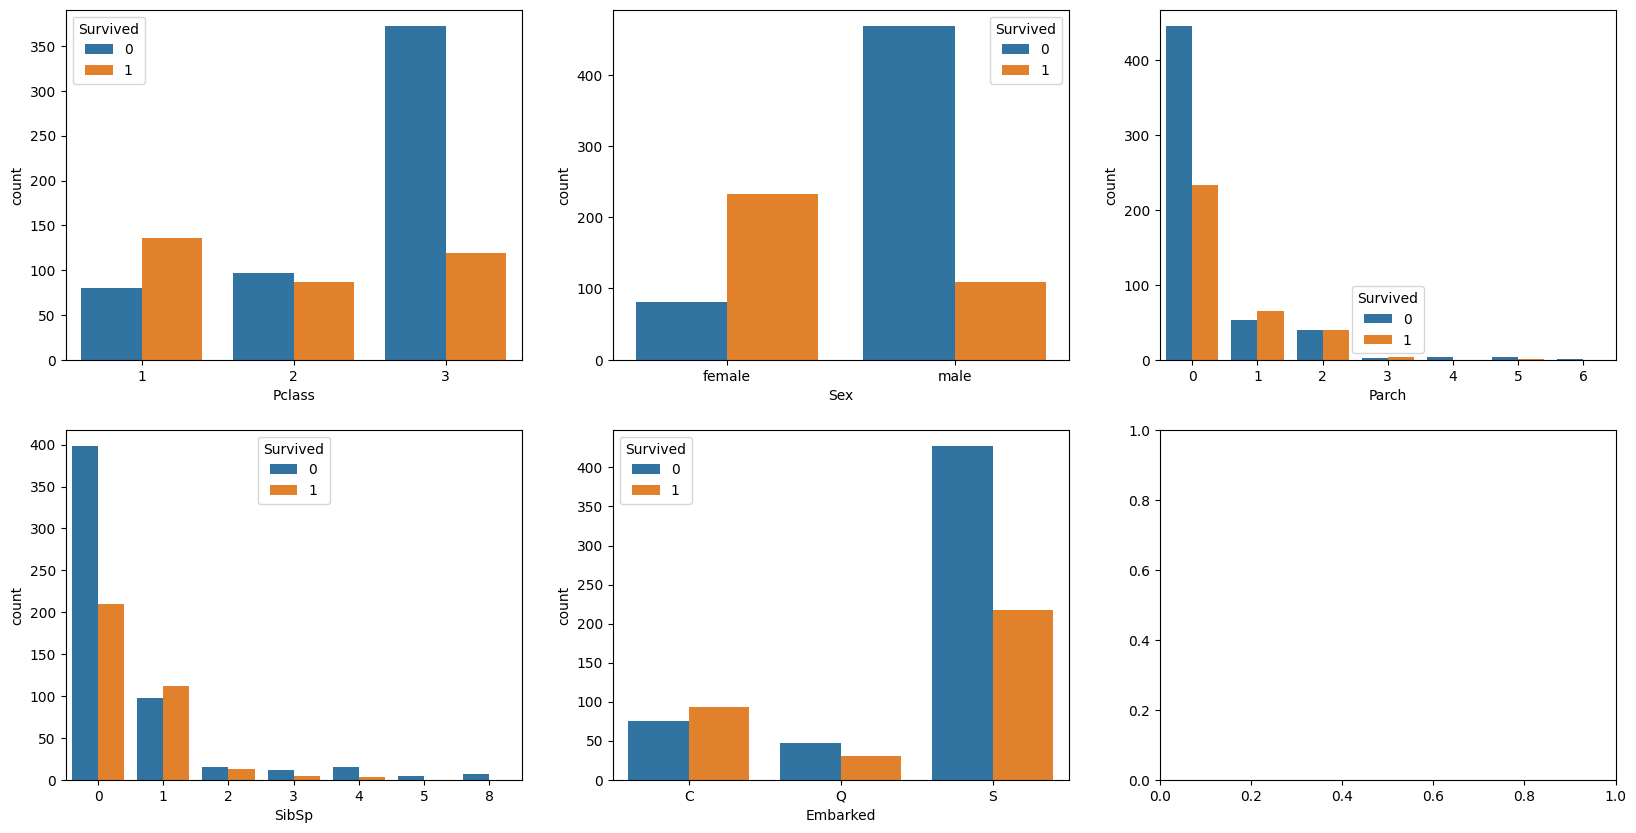

In [8]:
features = ['Pclass','Sex','Parch','SibSp','Embarked']
fig, ax = plt.subplots(2,3,figsize=(20,10))
for index, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Survived', ax=ax[index//3, index%3]);
    

We can see something like:
- `Pclass`: 1st class has the highest survival rate.
- `Sex`: Survival rate of Female is much more higher than Male.
- `Parch`, `SibSp`: Most of people go alone, and the survival rate is lower than people go with someone else.
- `Embarked`: Most of people embark from Southampton and have the lowest survival rate.

### 3.2 Numerical features
Let see the distribution for numerical features:

`Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

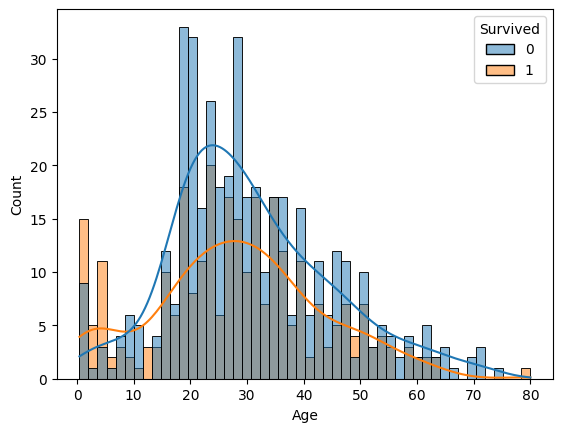

In [9]:
sns.histplot(data=df, x='Age', hue='Survived', bins=50, kde=True)

- As we can see most passengers is 18-40 ages
- Children (0-6) have more change to survive more than other ages

`Fare`

<AxesSubplot:xlabel='Fare', ylabel='Count'>

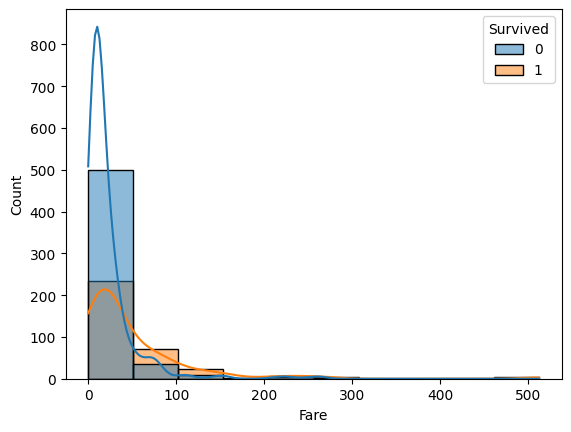

In [10]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=10, kde=True)

It is hard to see, Most of passengers have fare < 100. We will convert this feature to categorical features:
- Low
- Medium
- High
- Very High

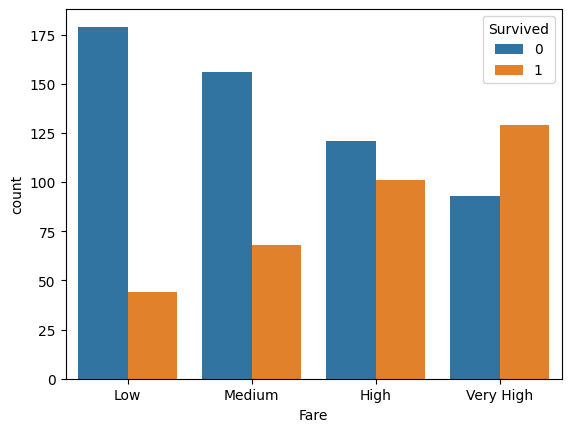

In [11]:
fare_categories = ['Low', 'Medium', 'High', 'Very High']
quartile_data = pd.qcut(df['Fare'], 4, labels=fare_categories)
sns.countplot(x=quartile_data, hue=df['Survived']);

Oh, we can see something now: The higher the fare, the greater the chance of survival.

# 4. Feature Engineering
Let's see train and test data

In [12]:
# Train data
train_df = pd.read_csv("./data/train.csv", index_col="PassengerId")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Missing values:
- `Cabin` has a lot of missing values, we will drop this feature
- `Age` consider to impute by median value
- `Embarked` Very few missing values, impute by the most frequent embarked
- `Fare` There is one missing value in test dataset, fill by mean value

Other features:
- `Name` there can be some information, but just drop it for now
- `Ticket`should be dropped

And we will standardize for numerical feature (`Age`, `Fare`) and one-hot encode for categorical features (`Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`)

In [14]:
# First we will need to concatenate train and test dataset to achieve the same standard for features
df = train_df.append(test_df)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [15]:
# Next we drop unnecessary features and handle missing values
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S
2,1.0,1,female,38.0,1,0,71.2833,C
3,1.0,3,female,26.0,0,0,7.9250,S
4,1.0,1,female,35.0,1,0,53.1000,S
5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1305,NaN,3,male,NaN,0,0,8.0500,S
1306,NaN,1,female,39.0,0,0,108.9000,C
1307,NaN,3,male,38.5,0,0,7.2500,S


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_features = ['Age', 'Fare']

df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Fare'] = SimpleImputer(strategy='mean').fit_transform(df[['Fare']])
df[num_features] = StandardScaler().fit_transform(df[num_features])
df[cat_features] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_features])
one_hot_encoded = pd.get_dummies(df[cat_features].astype(str))
df = pd.concat([df, one_hot_encoded], axis=1)

In [17]:
df.drop(columns=cat_features, inplace=True)

In [18]:
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,-0.581628,-0.503595,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0.658652,0.734503,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.0,-0.271558,-0.490544,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0.426099,0.382925,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.426099,-0.488127,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,-0.116523,-0.488127,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,NaN,0.736169,1.461829,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1307,NaN,0.697411,-0.503595,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


Now we have a cleaned dataset. We will split train and test dataset as we merged them above

In [19]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

# 5. Modeling and Evaluating
### 5.1 Modeling
Model architecture:
- One hidden layer with 8 units, dropout rate 0.2 and relu activation function.
- Output layer with 1 unit, using sigmoid activation function.
- Optimizer: Adam

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [171]:
model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.build((None,25))
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 8)                 208       
                                                                 
 dropout_108 (Dropout)       (None, 8)                 0         
                                                                 
 dense_148 (Dense)           (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [172]:
# Train the model
training = model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=100)

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6334 - val_loss: 0.6288 - val_accuracy: 0.7095
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.6475 - val_loss: 0.5960 - val_accuracy: 0.7207
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.6601 - val_loss: 0.5685 - val_accuracy: 0.7430
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.6826 - val_loss: 0.5434 - val_accuracy: 0.7598
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.6924 - val_loss: 0.5225 - val_accuracy: 0.7709
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.6868 - val_loss: 0.5056 - val_accuracy: 0.7877
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7022 - val_loss: 0.4909 - val_accuracy: 0.7765
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7949 - val_loss: 0.3723 - val_accuracy: 0.8547
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7907 - val_loss: 0.3731 - val_accuracy: 0.8492
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7921 - val_loss: 0.3738 - val_accuracy: 0.8492
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7992 - val_loss: 0.3728 - val_accuracy: 0.8492
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8020 - val_loss: 0.3721 - val_accuracy: 0.8603
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8034 - val_loss: 0.3702 - val_accuracy: 0.8547
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7921 - val_loss: 0.3714 - val_accuracy: 0.8492
Epoch 

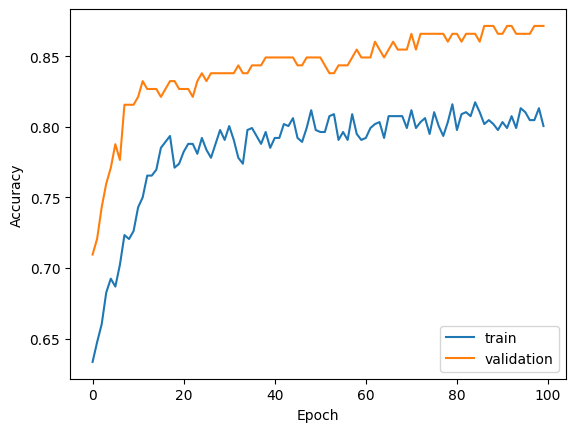

In [173]:
# Plot the training history
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

After 50 epochs, Accuracy of model is about **87%**

OK, now we will predict the test data then submit to Kaggle to see how well our model performs

In [174]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype('int')
test_data = pd.read_csv('./data/test.csv')
test_data['Survived'] = y_pred
test_data = test_data[['PassengerId', 'Survived']]
test_data.to_csv('titanic_submission.csv', index = False)

And the result from Kaggle: **78%**
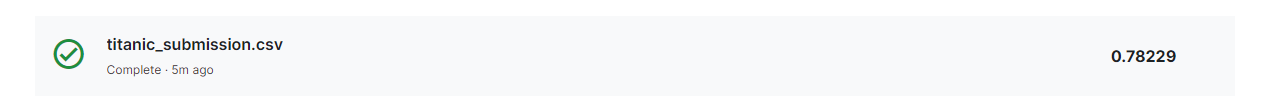